# MBG4999 | Capstone Project 

#### TITLE : 

INVESTIGATION OF THE RELATIONSHIP BETWEEN CYP1A2 GENOTYPES, CAFFEINE METABOLISM AND ENHANCED SPORTS PERFORMANCE:

A GENETIC BASED APPROACH TO OPTIMAL CAFFEINE CONSUMPTION PRACTICES FOR A HEALTHY SPORTS LIFESTYLE IN UNIVERSITY STUDENTS & YOUNG-ADULT TURKISH POPULATION

#### RESEARCHER :

UĞUR ERSÖZ

BAU | Faculty of Engineering and Natural Sciences | Molecular Biology and Genetics Department | Senior

In [1]:
import pandas as pd
import scipy.stats as stats
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")

In [2]:
import myvariant

rs_list = ['rs762551'] 
mv = myvariant.MyVariantInfo()

for rsid in rs_list:
    result = mv.query(f'dbsnp.rsid:{rsid}', fields='dbsnp')
    allele = result['hits'][0]['dbsnp']['alleles'][0]['allele']
    freq = result['hits'][0]['dbsnp']['alleles'][0]['freq']['1000g']
    print(f"Frequency of {allele} allele for {rsid}: {freq}")

Frequency of C allele for rs762551: 0.366


In [3]:
mv = myvariant.MyVariantInfo()
result = print(mv.query('dbsnp.rsid:rs762551', fields='dbsnp'))

{'took': 3, 'total': 2, 'max_score': 16.316612, 'hits': [{'_id': 'chr15:g.75041917C>G', '_score': 16.316612, 'dbsnp': {'_license': 'http://bit.ly/2AqoLOc', 'alleles': [{'allele': 'C', 'freq': {'1000g': 0.366, 'alspac': 0.276, 'dbgap_popfreq': 0.319, 'estonian': 0.333, 'genome_dk': 0.275, 'gnomad': 0.325, 'gonl': 0.252, 'hapmap': 0.41, 'korea1k': 0.358, 'korean': 0.354, 'northernsweden': 0.257, 'page_study': 0.336, 'prjeb36033': 0.465, 'prjeb37584': 0.381, 'qatari': 0.31, 'sgdp_prj': 0.297, 'siberian': 0.174, 'tommo': 0.364, 'topmed': 0.324, 'twinsuk': 0.257, 'vietnamese': 0.286}}, {'allele': 'A', 'freq': {'1000g': 0.634, 'alspac': 0.724, 'dbgap_popfreq': 0.681, 'estonian': 0.667, 'genome_dk': 0.725, 'gnomad': 0.675, 'gonl': 0.748, 'hapmap': 0.59, 'korea1k': 0.642, 'korean': 0.646, 'northernsweden': 0.743, 'page_study': 0.664, 'prjeb36033': 0.535, 'prjeb37584': 0.619, 'qatari': 0.69, 'sgdp_prj': 0.703, 'siberian': 0.826, 'tommo': 0.636, 'topmed': 0.676, 'twinsuk': 0.743, 'vietnamese': 0

In [4]:
from Bio import Entrez


Entrez.email = "ugurersoz99@gmail.com"

handle = Entrez.esearch(db="snp", term="rs762551")
record = Entrez.read(handle)
id = record["IdList"][0]
handle = Entrez.efetch(db="snp", id=id, rettype="docsum")


data = None
for line in handle:
    if "ALL" in line:
        data = line.split(":")[1].strip()
        break
    elif "GLOBAL" in line:
        data = line.split(":")[1].strip()
        break

if data:
    print("rs762551 population data:", data)
else:
    print("Population data not found for rs762551.")

rs762551 population data: 74749575


## Article 1  : Does CYP1A2 Genotype Influence Coffee Consumption?

Resource : [Article 1](https://austinpublishinggroup.com/pharmacology-therapeutics/fulltext/ajpt-v3-id1065.pdf)

In [5]:
df = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Article 1\\Article #1.xlsx")

In [6]:
article1_df= df.loc[:,["Sample ID", "Caffeine Plasma levels (mg/L)","CYP 1A2 Genotype","Metabolizer Phenotype", "Coffee Drinker", "Cups of coffee/day"]]

article1_df.replace(["*1F/*1A","*1A/*1A","*1F/*1F"], ["AC","AA","CC"], inplace=True)
article1_df.dropna(inplace=True)
article1_df    

,Sample ID,Caffeine Plasma levels (mg/L),CYP 1A2 Genotype,Metabolizer Phenotype,Coffee Drinker,Cups of coffee/day
0,0214C,39,AC,Intermediate,yes,1 cup/day
1,0314C,1,AA,Fast,no,none
2,0414C,67,AA,Fast,no,none
3,0514C,16,AA,Fast,yes,1 cup every other day
4,0614C,16,AA,Fast,no,none
5,0714C,11,AC,Intermediate,yes,1 cup/week
6,1114C,111,CC,Slow,yes,1 cup/day
7,0914C,23,AA,Fast,yes,3 cups/week
8,1014C,0,AA,Fast,no,none
9,0814C,44,AA,Fast,yes,1 cup/day


In [7]:
print(article1_df.describe())

       Caffeine Plasma levels (mg/L)
count                      11.000000
mean                       34.181818
std                        32.987325
min                         0.000000
25%                        13.500000
50%                        23.000000
75%                        46.000000
max                       111.000000


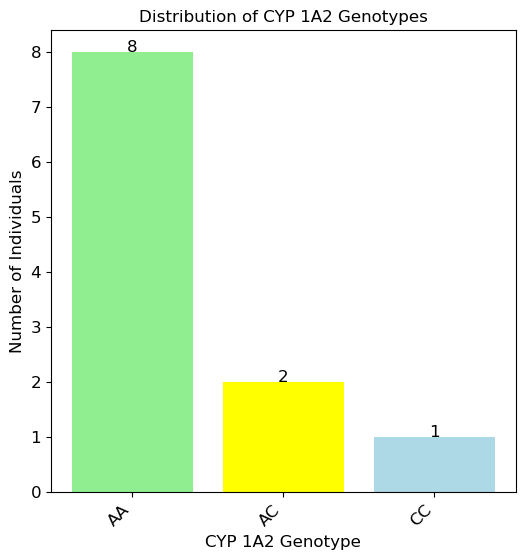

In [8]:
genotype_counts = article1_df['CYP 1A2 Genotype'].value_counts()

fig, ax = plt.subplots(figsize=(6,6))


ax.bar(genotype_counts.index, genotype_counts.values, color=['lightgreen', 'yellow', 'lightblue'])


for i, count in enumerate(genotype_counts.values):
    ax.text(i, count + 0.01, str(count), ha='center', fontsize=12)

ax.set_title('Distribution of CYP 1A2 Genotypes', fontsize=12)
ax.set_xlabel('CYP 1A2 Genotype', fontsize=12)
ax.set_ylabel('Number of Individuals', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(genotype_counts.index, rotation=45, ha="right")


plt.show()

In [9]:
aa_genotype = article1_df[article1_df['CYP 1A2 Genotype'] == 'AA']
ac_genotype = article1_df[article1_df['CYP 1A2 Genotype'] == 'AC']
cc_genotype = article1_df[article1_df['CYP 1A2 Genotype'] == 'CC']

print("Mean caffeine levels for AA genotype:", aa_genotype['Caffeine Plasma levels (mg/L)'].mean())
print("Mean caffeine levels for AC genotype:", ac_genotype['Caffeine Plasma levels (mg/L)'].mean())
print("Mean caffeine levels for CC genotype:", cc_genotype['Caffeine Plasma levels (mg/L)'].mean())


Mean caffeine levels for AA genotype: 26.875
Mean caffeine levels for AC genotype: 25.0
Mean caffeine levels for CC genotype: 111.0


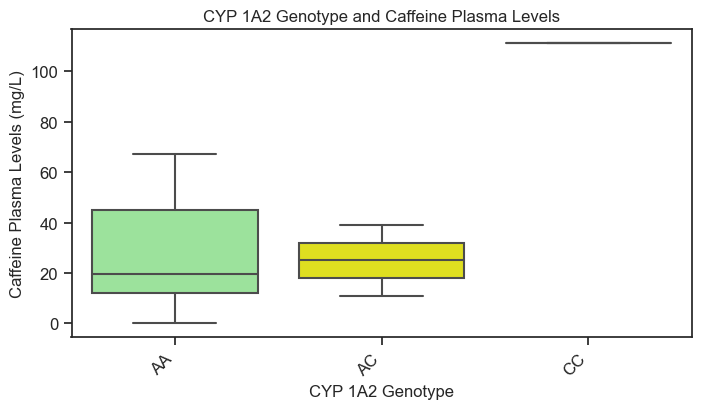

In [10]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(x='CYP 1A2 Genotype', y='Caffeine Plasma levels (mg/L)', data=article1_df, ax=ax, palette=['lightgreen', 'yellow', 'lightblue'], order=['AA', 'AC', 'CC'])

ax.set_title('CYP 1A2 Genotype and Caffeine Plasma Levels', fontsize=12)
ax.set_xlabel('CYP 1A2 Genotype', fontsize=12)
ax.set_ylabel('Caffeine Plasma Levels (mg/L)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

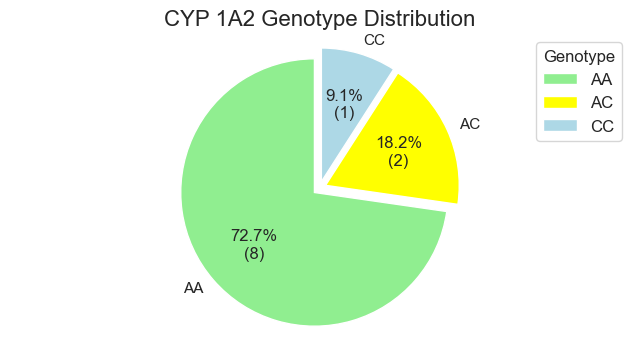

In [11]:
# frequency of each genotype
cyp_freq = article1_df['CYP 1A2 Genotype'].value_counts()

# distribution of genotypes
labels = ['AA', 'AC', 'CC']
sizes = cyp_freq.values
colors = ['lightgreen', 'yellow', 'lightblue']
explode = (0.05, 0.05, 0.05)

fig, ax = plt.subplots(figsize=(8,4))
ax.pie(sizes, explode=explode, labels=labels,
       colors=colors, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sizes.sum())})',
       startangle=90)
ax.set_title('CYP 1A2 Genotype Distribution', fontsize=16)
ax.axis('equal')
ax.legend(title='Genotype', loc='upper right', labels=labels, fontsize=12)

plt.show()


## Article 2 : Evaluation of Caffeine Ingested Timing on Endurance Performance based on  CYP1A2 rs762551 Profiling in  Healthy Sedentary Young Adults 

Resource : [Article 2](https://rbmb.net/article-1-1020-en.pdf) 

In [12]:
df_1 = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Article 2\\Article #2.xlsx")

In [13]:
df_1

,Gender,Groups,Metabolize type,Age,Body Mass (kg),BMI,Fat (%),Muscle (%)
0,Males,AA (n=8),Fast,22.00±1.20,67.95±6.17,22.71±1.30,19.73±4.89,34.55±2.11
1,Males,AC (n=8),Slow,21.00±0.76,61.70±7.94,21.49±2.41,14.30±3.83,36.63±1.73
2,Females,AA (n=7),Fast,21.00±0.00,54.66±8.70,21.83±2.27,0.036,0.059
3,Females,CC (n=7),Slow,21.00±0.58,56.50±8.18,21.53±2.16,27.51±2.07,26.87±0.87


## Article 3 : Determination of the Distribution of the rs2069514 and rs762551 Alleles of the Cyp1a2 Gene Related to Caffeine Metabolism in Professional Athletes

Resource : [Article 3](https://pdfs.semanticscholar.org/9696/b16e0995265a51bcd7c07c93f37c1b4d0135.pdf)

In [14]:
df_2 = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Article 3\\Article #3.xlsx")

In [15]:
df_2

,Athletes,rs762551,Branch,Caffeine metabolism\nrate (rs762551)
0,1,AA,Short distance,Rapid
1,2,AC,Short distance,Slow
2,3,AC,Short distance,Slow
3,4,AA,Short distance,Rapid
4,5,AC,Short distance,Normal
5,6,AC,Short distance,Slow
6,7,AC,Short distance,Slow
7,8,AC,Short distance,Slow
8,9,AC,Short distance,Slow
9,10,AA,Short distance,Rapid


In [16]:
print(df_2.describe())

       Athletes
count  20.00000
mean   10.50000
std     5.91608
min     1.00000
25%     5.75000
50%    10.50000
75%    15.25000
max    20.00000


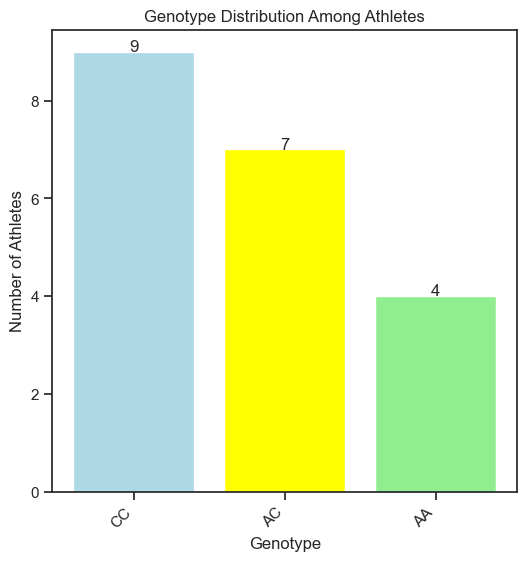

In [17]:
genotype_counts = df_2['rs762551'].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))

colors = {'AA': 'lightgreen', 'AC': 'yellow', 'CC': 'lightblue'}

ax.bar(genotype_counts.index, genotype_counts.values, color=[colors[x] for x in genotype_counts.index])

for i, count in enumerate(genotype_counts.values):
    ax.text(i, count + 0.01, str(count), ha='center', fontsize=12)

ax.set_title('Genotype Distribution Among Athletes', fontsize=12)
ax.set_xlabel('Genotype', fontsize=12)
ax.set_ylabel('Number of Athletes', fontsize=12)
ax.set_xticklabels(genotype_counts.index, rotation=45, ha="right")

plt.show()


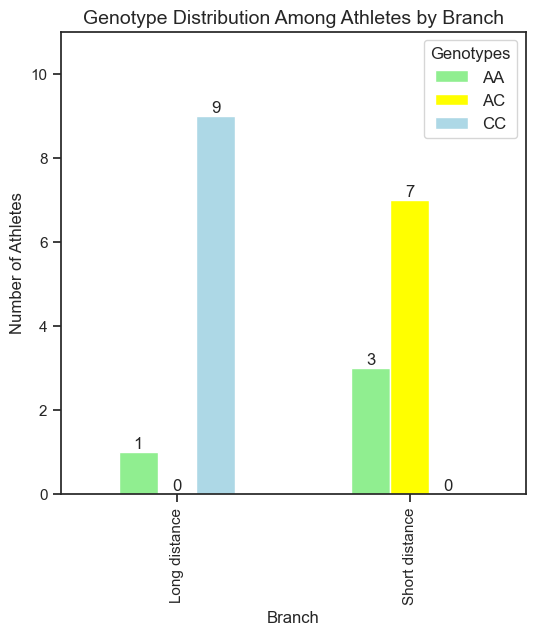

In [18]:
df_crosstab = pd.crosstab(df_2['Branch'], df_2['rs762551'])

labels = df_crosstab.index
sizes = df_crosstab.values
colors = {'AA': 'lightgreen', 'AC': 'yellow', 'CC': 'lightblue'}

ax = df_crosstab.plot(kind="bar", figsize=(6, 6), color=colors.values())
ax.set_xlabel('Branch', fontsize=12)
ax.set_ylabel('Number of Athletes', fontsize=12)
ax.set_title('Genotype Distribution Among Athletes by Branch', fontsize=14)
ax.legend(title='Genotypes', loc='upper right', bbox_to_anchor=(1, 1), fontsize=12)

ct = pd.Series(df_crosstab.sum(axis=1))
ax.set_ylim(0, ct.max() + 1)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

plt.show()


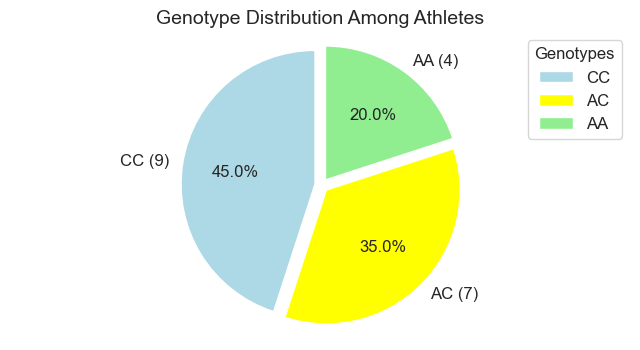

In [19]:
genotype_counts = df_2['rs762551'].value_counts()
labels = genotype_counts.index
sizes = genotype_counts.values
colors = {'AA': 'lightgreen', 'AC': 'yellow', 'CC': 'lightblue'}
explode = (0.05, 0.05, 0.05)


fig, ax = plt.subplots(figsize=(8,4))

ax.pie(sizes, labels=[f'{label} ({count})' for label, count in zip(labels, sizes)],
       colors=[colors[label] for label in labels], explode=explode, autopct='%1.1f%%',
       startangle=90, textprops={'fontsize': 12})

ax.set_title('Genotype Distribution Among Athletes', fontsize=14)
ax.axis('equal')
ax.legend(title='Genotypes', loc='upper right', labels=labels, fontsize=12)

plt.show()


## Article 4 : Determination of Allele Distribution of CYP1A2 Gene rs762551 Polymorphism on Caffeine Metabolism in Healthy Individuals 

Resource: [Article 4](https://www.researchgate.net/publication/349118016_Determination_of_Allele_Distribution_of_CYP1A2_Gene_rs762551_Polymorphism_on_Caffeine_Metabolism_in_Healthy_Individuals)

In [21]:
df_3 = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Article 4\\Article #4.xlsx")

In [22]:
df_3

,Participant,Rs762551,The Speed of Caffeine Metabolizing
0,1,AA,Rapid
1,2,AA,Rapid
2,3,AA,Rapid
3,4,AA,Rapid
4,5,AA,Rapid
5,6,AA,Rapid
6,7,AA,Rapid
7,8,AA,Rapid
8,9,AA,Rapid
9,10,AA,Rapid


In [23]:
genotypes = df_3['Rs762551']


faster_metabolism = genotypes == 'AA'
normal_metabolism = genotypes == 'AC'
slow_metabolism = genotypes == 'CC'


if any(faster_metabolism):
    print("Faster caffeine metabolism in smokers and heavy coffee consumers:")
    print(df_3.loc[faster_metabolism])
    print("https://www.snpedia.com/index.php/Rs762551(A;A) \n")

if any(normal_metabolism):
    print("Carrier of one CYP1A2*1F allele; Normal metabolism of caffeine:")
    print(df_3.loc[normal_metabolism])
    print("https://www.snpedia.com/index.php/Rs762551(A;C) \n")

if any(slow_metabolism):
    print("Normal metabolism of caffeine:")
    print(df_3.loc[slow_metabolism])
    print("https://www.snpedia.com/index.php/Rs762551(C;C) \n")

Faster caffeine metabolism in smokers and heavy coffee consumers:
    Participant Rs762551 The Speed of Caffeine Metabolizing
0             1       AA                              Rapid
1             2       AA                              Rapid
2             3       AA                              Rapid
3             4       AA                              Rapid
4             5       AA                              Rapid
5             6       AA                              Rapid
6             7       AA                              Rapid
7             8       AA                              Rapid
8             9       AA                              Rapid
9            10       AA                              Rapid
10           11       AA                              Rapid
11           12       AA                              Rapid
12           13       AA                              Rapid
https://www.snpedia.com/index.php/Rs762551(A;A) 

Carrier of one CYP1A2*1F allele; Normal meta

In [24]:
from scipy.stats import chi2_contingency

# Summmary stats
geno_counts = df_3['Rs762551'].value_counts()
print("Genotype counts:\n ", geno_counts)

speed_counts = df_3['Rs762551'].value_counts()
print("\nCaffeine metabolizing speed counts:\n", speed_counts)

# Chi-square test to test the association between genotype and caffeine metabolism
contingency_table = pd.crosstab(df_3['Rs762551'], df_3['The Speed of Caffeine Metabolizing'])
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", pval)

Genotype counts:
  AA    13
AC     9
CC     8
Name: Rs762551, dtype: int64

Caffeine metabolizing speed counts:
 AA    13
AC     9
CC     8
Name: Rs762551, dtype: int64

Chi-square test results:
Chi-square statistic: 60.0
p-value: 2.9008631203404573e-12


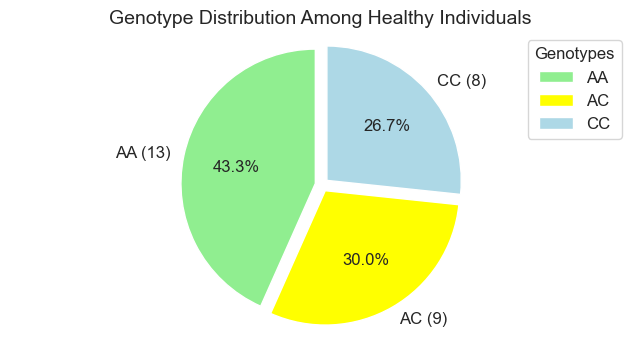

In [26]:
genotype_counts = df_3['Rs762551'].value_counts()
labels = genotype_counts.index
sizes = genotype_counts.values
colors = {'AA': 'lightgreen', 'AC': 'yellow', 'CC': 'lightblue'}
explode = (0.05, 0.05, 0.05)


fig, ax = plt.subplots(figsize=(8,4))

ax.pie(sizes, labels=[f'{label} ({count})' for label, count in zip(labels, sizes)],
       colors=[colors[label] for label in labels], explode=explode, autopct='%1.1f%%',
       startangle=90, textprops={'fontsize': 12})

ax.set_title('Genotype Distribution Among Healthy Individuals', fontsize=14)
ax.axis('equal')
ax.legend(title='Genotypes', loc='upper right', labels=labels, fontsize=12)

plt.show()

In [27]:
def caffeine_metabolism(genotype):
    """Caffeine metabolism."""
    if genotype == 'AA':
        return 'Fast metabolizer'
    elif genotype == 'AC' or genotype == 'CC':
        return 'Slow metabolizer'
    else:
        return 'Unable to determine'

genotype = 'AA'
metabolism = caffeine_metabolism(genotype)
print(f'The predicted caffeine metabolism for genotype {genotype} is: {metabolism}')

The predicted caffeine metabolism for genotype AA is: Fast metabolizer


## Article 5 : Analysis of the CYP1A2 caffeine metabolism gene in the student population at Lake Superior State University

Resource :[Article 5](https://www.biorxiv.org/content/10.1101/2022.06.14.496190v1.full.pdf)

In [28]:
df_4 = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Article 5\\Article #5.xlsx")

In [29]:
df_4   #Includes only data from the European Population

,European Nationality,AA,AC,CC,Total,AA(%),AC(%),CC(%)
0,Denmark,3,0,0,3,100.00,0.00,0.00
1,Finland,6,3,2,11,54.55,27.27,18.18
2,Norway,1,2,0,3,33.33,66.67,0.00
3,Sweden,1,2,1,4,25.00,50.00,25.00
4,Armenia,1,0,0,1,100.00,0.00,0.00
5,Russia,1,0,1,2,50.00,0.00,50.00
6,Ukraine,1,1,0,2,50.00,50.00,0.00
7,Austria,0,1,0,1,0.00,100.00,0.00
8,Germany,22,39,8,69,31.88,56.52,11.59
9,Hungary,0,1,1,2,0.00,50.00,50.00


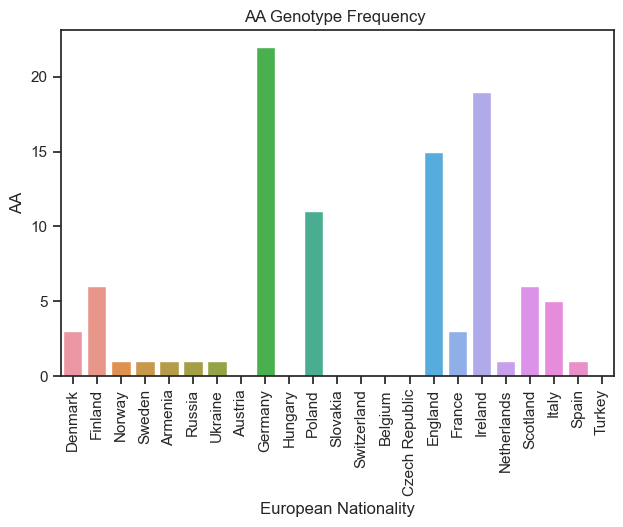

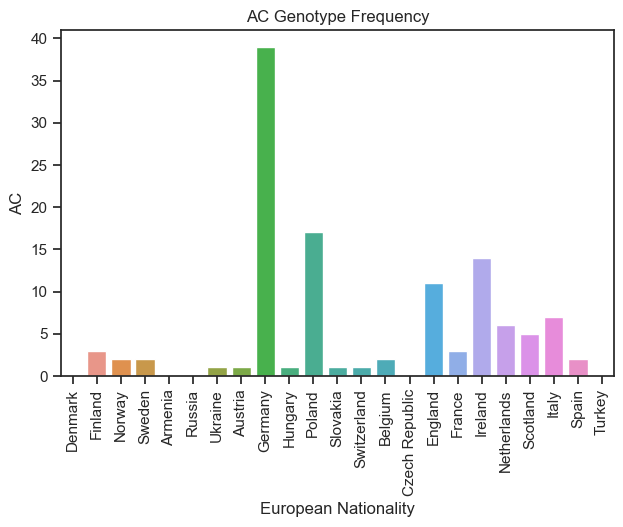

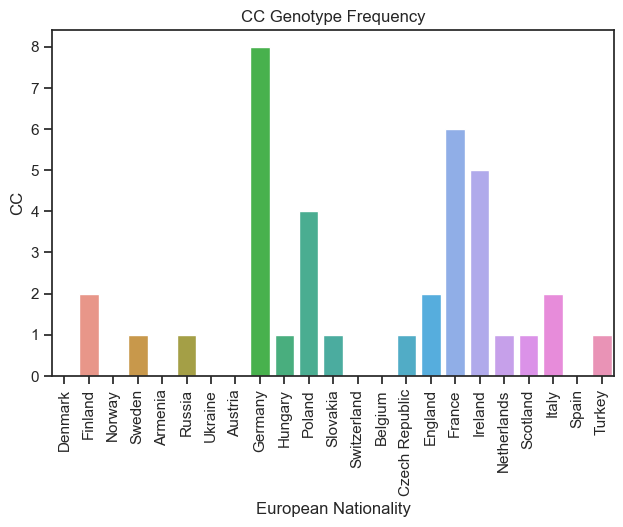

In [30]:
# AA genotype
sns.barplot(x='European Nationality', y='AA', data=df_4)
plt.xticks(rotation=90)
plt.title('AA Genotype Frequency ')
plt.tight_layout() 
plt.subplots_adjust(bottom=0.2) 
plt.show()

# AC genotype
sns.barplot(x='European Nationality', y='AC', data=df_4)
plt.xticks(rotation=90)
plt.title('AC Genotype Frequency')
plt.tight_layout() 
plt.subplots_adjust(bottom=0.2) 
plt.show()

# CC genotype
sns.barplot(x='European Nationality', y='CC', data=df_4)
plt.xticks(rotation=90)
plt.title('CC Genotype Frequency')
plt.tight_layout() 
plt.subplots_adjust(bottom=0.2) 
plt.show()


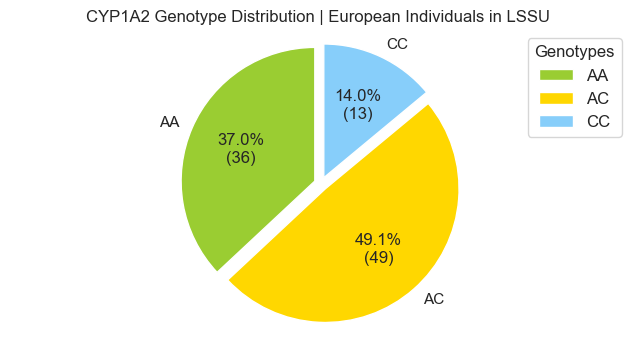

In [31]:
# Percentages of AA, AC and CC genotypes
aa_percent = df_4['AA'].sum() / df_4['Total'].sum() * 100
ac_percent = df_4['AC'].sum() / df_4['Total'].sum() * 100
cc_percent = df_4['CC'].sum() / df_4['Total'].sum() * 100

# Calculate counts
aa_count = df_4['AA'].sum()
ac_count = df_4['AC'].sum()
cc_count = df_4['CC'].sum()

labels = ['AA', 'AC', 'CC']
sizes = [aa_percent, ac_percent, cc_percent]
explode = (0.05, 0.05, 0.05)
colors = ['yellowgreen', 'gold', 'lightskyblue']

fig, ax = plt.subplots(figsize=(8,4))

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(sizes))})', startangle=90)
ax.set_title('CYP1A2 Genotype Distribution | European Individuals in LSSU ', fontsize=12)
ax.axis('equal')
ax.legend(title='Genotypes', loc='upper right', labels=labels, fontsize=12)

plt.show()


##  1000 Genomes Project phase3 European Population (CYP1A2 -rs762551)

Resource : [1000 Genomes Project](https://www.ensembl.org/Homo_sapiens/Variation/Sample?db=core;r=15:74749076-74750076;v=rs762551;vdb=variation;vf=104006280#)

In [39]:
european_df = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Genotypes for 1000GENOMES phase_3 EUR.xlsx")

In [40]:
european_df.replace({'A|A': 'AA', 'A|C': 'AC', 'C|C': 'CC', 'C|A':'AC'}, inplace=True)
european_df

,Sample ID and Gender,Genotypes,Populations
0,HG00096 (M),AA,"ALL, EUR, GBR"
1,HG00099 (F),AA,"ALL, EUR, GBR"
2,HG00100 (F),AA,"ALL, EUR, GBR"
3,HG00102 (F),AA,"ALL, EUR, GBR"
4,HG00103 (M),AA,"ALL, EUR, GBR"
...,...,...,...
498,NA20803 (M),CC,"ALL, EUR, TSI"
499,NA20808 (F),CC,"ALL, EUR, TSI"
500,NA20814 (M),CC,"ALL, EUR, TSI"
501,NA20821 (F),CC,"ALL, EUR, TSI"


In [41]:
import webbrowser

url = 'http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/README_populations.md'
webbrowser.open(url)

True

[1000 Genomes Project Populations README](http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/README_populations.md)

In [42]:
!curl http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/README_populations.md

#Populations

This file describes the population codes where assigned to samples collected for the 1000 Genomes project. These codes are used to organise the files in the data_collections' project data directories and can also be found in column 11 of many sequence index files.

There are also two tsv files, which contain the population codes and descriptions for both the sub and super populations that were used in phase 3 of the 1000 Genomes Project:

ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/20131219.populations.tsv
ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/20131219.superpopulations.tsv

###Populations and codes

         CHB	Han Chinese             Han Chinese in Beijing, China
         JPT	Japanese                Japanese in Tokyo, Japan
         CHS	Southern Han Chinese    Han Chinese South
         CDX	Dai Chinese             Chinese Dai in Xishuangbanna, China
         KHV	Kinh Vietnamese         Kinh in Ho Chi Minh City, Vietnam
         CHD	Denver Chinese          

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2515  100  2515    0     0  16712      0 --:--:-- --:--:-- --:--:-- 16879


In [43]:
print(european_df.describe())

       Sample ID and Gender  Genotypes    Populations
count                    503       503            503
unique                   503         3              5
top              HG00096 (M)        AA  ALL, EUR, IBS
freq                       1       239            107


In [44]:
print(european_df['Populations'].value_counts())  

ALL, EUR, IBS    107
ALL, EUR, TSI    107
ALL, EUR, FIN     99
ALL, CEU, EUR     99
ALL, EUR, GBR     91
Name: Populations, dtype: int64


In [45]:
# A genotipine sahip bireylerin sayısı
AA_genotipi = european_df[european_df['Genotypes'].str.contains('AA')]
print(len(AA_genotipi))

239


In [46]:
# AC genotipine sahip bireylerin sayısı
AC_genotipi = european_df[european_df['Genotypes'].str.contains('AC')]
print(len(AC_genotipi))

206


In [47]:
# CC genotipine sahip bireylerin sayısı
CC_genotipi = european_df[european_df['Genotypes'].str.contains('CC')]
print(len(CC_genotipi))

58


In [48]:
genotip_sikliklari = european_df['Genotypes'].value_counts(normalize=True)
print(genotip_sikliklari)

AA    0.475149
AC    0.409543
CC    0.115308
Name: Genotypes, dtype: float64


In [49]:
pop_counts = european_df['Populations'].str.split(',', expand=True).melt()['value'].value_counts()

In [50]:
pop_counts

ALL     503
 EUR    503
 IBS    107
 TSI    107
 CEU     99
 FIN     99
 GBR     91
Name: value, dtype: int64

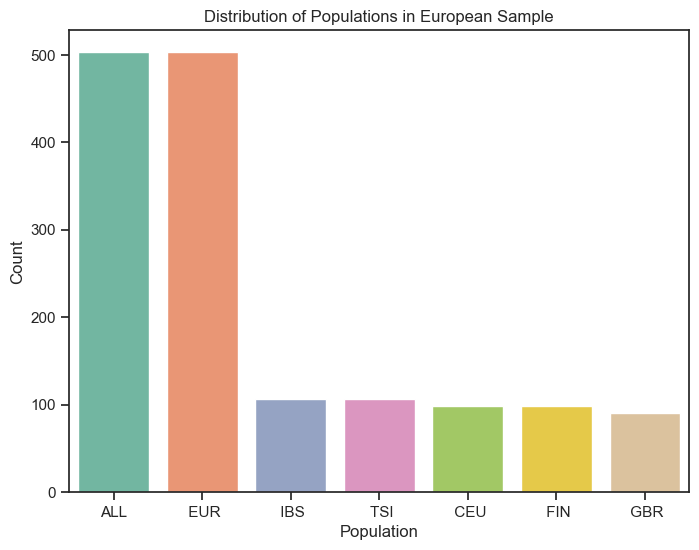

In [51]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=pop_counts.index, y=pop_counts.values, palette='Set2')
ax.set_xlabel('Population')
ax.set_ylabel('Count')
ax.set_title('Distribution of Populations in European Sample')
plt.show()

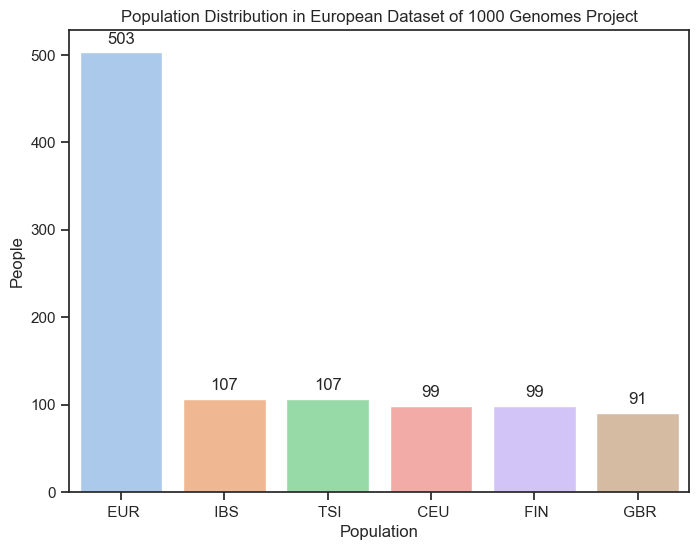

In [52]:
pop_counts = european_df['Populations'].str.split(',', expand=True).melt()['value'].value_counts()
pop_counts = pop_counts.drop('ALL')  

plt.figure(figsize=(8,6))
sns.barplot(x=pop_counts.index, y=pop_counts.values, palette='pastel')
plt.xlabel('Population')
plt.ylabel('People')


plt.title('Population Distribution in European Dataset of 1000 Genomes Project')


for index, value in enumerate(pop_counts.values):
    plt.text(index, value+10, str(value), ha='center', fontsize=12)

plt.show()

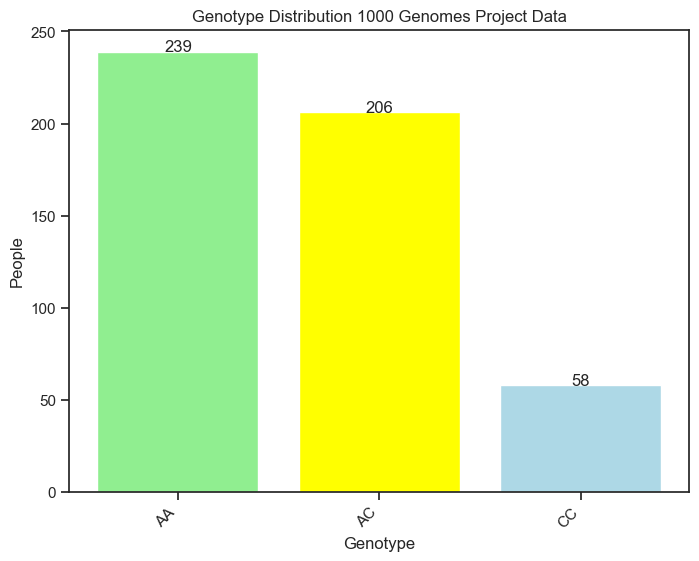

In [53]:
euro_genotype_counts = european_df['Genotypes'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))

colors = {'AA': 'lightgreen', 'AC': 'yellow', 'CC': 'lightblue', 'CA':'green'}

ax.bar(euro_genotype_counts.index, euro_genotype_counts.values, color=[colors[x] for x in euro_genotype_counts.index])

for i, count in enumerate(euro_genotype_counts.values):
    ax.text(i, count + 0.01, str(count), ha='center', fontsize=12)

ax.set_title('Genotype Distribution 1000 Genomes Project Data', fontsize=12)
ax.set_xlabel('Genotype', fontsize=12)
ax.set_ylabel('People', fontsize=12)
ax.set_xticklabels(euro_genotype_counts.index, rotation=45, ha="right")

plt.show()

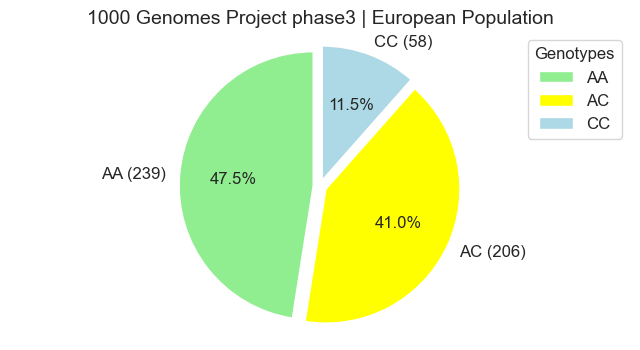

In [56]:
genotype_counts = european_df['Genotypes'].value_counts()
labels = genotype_counts.index
sizes = genotype_counts.values
colors = {'AA': 'lightgreen', 'AC': 'yellow', 'CC': 'lightblue'}
explode = (0.05, 0.05, 0.05)


fig, ax = plt.subplots(figsize=(8,4))

ax.pie(sizes, labels=[f'{label} ({count})' for label, count in zip(labels, sizes)],
       colors=[colors[label] for label in labels], explode=explode, autopct='%1.1f%%',
       startangle=90, textprops={'fontsize': 12})

ax.set_title('1000 Genomes Project phase3 | European Population', fontsize=14)
ax.axis('equal')
ax.legend(title='Genotypes', loc='upper right', labels=labels, fontsize=12)

plt.show()

In [59]:
survey_df = pd.read_excel("C:\\Users\\uerso\\OneDrive\\Masaüstü\\MBG4999\\data\\Capstone Project_Yanıtlar_tr_en.xlsx")
survey_df

,Sample ID,Your gender?,Your age?,Which caffeinated products do you consume?,How often do you consume caffeinated beverages or foods?,How many cups of coffee do you drink on average per day?,Do you do sports?,What sport/sports do you do? [Sports],Do you consume caffeinated beverages or foods before or after sports?,Do you notice a change in your sports performance after consuming caffeinated beverages or foods?,Have you been informed about caffeine consumption?,What resources do you refer to to learn more about the possible effects of caffeine consumption on sports performance?,Do you know the CYP1A2 gene?,Have you had any genetic testing before?,Do you know your CYP1A2 genotype? (Indicated as in the image.),How many days a week do you exercise?
0,ID2023P54,Female,22.00000,"Tea, Coke",1 in 2 days,I don't drink at all.,a. Yes I do,Fitness,I don't consume,c. I'm not sure about the effect of my caffein...,"a. Yes, I got it.",a. Trainer or nutritionist,b. No,Yes,I don't know.,2
1,ID2023P14,Female,31.00000,"Coffee, Tea",1-2 foods a day,1-2 cups,a. Yes I do,Swimming,I Consume After Sports,c. I'm not sure about the effect of my caffein...,"b. No, I was never informed",b. Internet calls,b. No,No,I don't know.,1
2,ID2023P15,Female,24.00000,"Coffee, Tea, Energy Drinks",1-2 foods a day,1-2 cups,a. Yes I do,"Basketball, Volleyball, Swimming",I don't consume,c. I'm not sure about the effect of my caffein...,"a. Yes, I got it.",a. Trainer or nutritionist,b. No,No,I don't know.,3
3,ID2023P16,Female,22.00000,"Coffee, Tea, Coke",1-2 foods a day,1-2 cups,a. Yes I do,Fitness,I consume before sports,c. I'm not sure about the effect of my caffein...,"a. Yes, I got it.",a. Trainer or nutritionist,b. No,No,I don't know.,5
4,ID2023P17,Male,19.00000,"Tea, Coke",1-2 foods a day,I don't drink at all.,"b. No, I don't",NaN,I don't consume,c. I'm not sure about the effect of my caffein...,"b. No, I was never informed",b. Internet calls,b. No,No,I don't know.,I don't do sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,ID2023P11,Female,16.00000,"Coffee, Tea",5 or more foods per day,3-4 cups,a. Yes I do,Athletics,I Consume After Sports,"b. No, I don't feel a change in my performance","a. Yes, I got it.",b. Internet calls,b. No,No,I don't know.,1
61,ID2023P37,Male,29.00000,"Coffee, Tea, Coke",5 or more foods per day,3-4 cups,"b. No, I don't",NaN,I Consume After Sports,c. I'm not sure about the effect of my caffein...,"a. Yes, I got it.",b. Internet calls,b. No,No,I don't know.,I don't do sports
62,ID2023P67,Male,29.00000,"Coffee, Tea, Coke",5 or more foods per day,1-2 cups,a. Yes I do,Football,I don't consume,"a. Yes, I'm performing better","b. No, I was never informed",b. Internet calls,b. No,No,I don't know.,2
63,ID2023P13,Male,35.00000,"Coffee, Tea",once a week,I don't drink at all.,a. Yes I do,"Swimming, Cycling",I don't consume,c. I'm not sure about the effect of my caffein...,"b. No, I was never informed",a. Trainer or nutritionist,b. No,No,I don't know.,2


In [60]:
survey_df['Your gender?']

0     Female
1     Female
2     Female
3     Female
4       Male
       ...  
60    Female
61      Male
62      Male
63      Male
64       NaN
Name: Your gender?, Length: 65, dtype: object

In [61]:
survey_df['Your age?']

0     22.00000
1     31.00000
2     24.00000
3     22.00000
4     19.00000
        ...   
60    16.00000
61    29.00000
62    29.00000
63    35.00000
64    24.40625
Name: Your age?, Length: 65, dtype: float64